In [1]:
# Dynohash
# a dynamic POW hash puzzle based on a maximum payload
# this is to maintain low tx fees but still allow complex data to be passed around
# the idea is that lets assume a tx max size of 1kb
# most txs are say 100 bytes
# if an attacker wants to spam the network, if its not 10x as hard to solve a 1kb payload, then they can do 
# much more damage.
# thus...
#
# take the original hashcash idea where H(PAYLOAD + nonce) = 0x000...abc, where the number of leading 0s
# fluctuates. this is the difficulty
# however, in a normal hash, which is usually 64 bytes, thats only 64 degrees of difficulty granularity
# we should smash it down into binary where each byte is 8 bits so that a 64 byte payload now has
# 512 degrees of granularity.
# let's just code it.

import hashlib

In [2]:
h = hashlib.sha256()

In [3]:
import secrets

In [5]:
secrets.token_bytes()

b'm\x97\xd3$Nj\x06\x9b\xa3\xdb\x8a\x0f!\xefD\xf5a1\xc4 f\xd9\x83D\xba\x7f(\x7f24\x04\x9e'

In [10]:
def byte_to_int(b):
    x = 0
    for bb in b:
        x = x * 256 + int(bb)
    return x

In [11]:
bin(byte_to_int(secrets.token_bytes()))

'0b111000101101011111000000010100001011000011011011000001000010101101101001001010110001110110001011110100100101011011111111110010011100000010011010000001001101000001111011100010011001101101100010100101111110100100010011101010000110111101111111010011000'

In [72]:
s = secrets.token_bytes()


while bin(byte_to_int(s))[3:][:5] != '00000':
    s = secrets.token_bytes()
    
print(s)
print(bin(byte_to_int(s)))

b'\x04\n\xe5Oj|h%/A\xd3\xcct\xb3\xe2\xfd\x8d\xa6\xd2\x08\xe4\x13\xe1\xd7/t\x8d\r\xcf[\xb5\xb0'
0b10000001010111001010100111101101010011111000110100000100101001011110100000111010011110011000111010010110011111000101111110110001101101001101101001000001000111001000001001111100001110101110010111101110100100011010000110111001111010110111011010110110000


In [97]:
def mini_dyno(difficulty=10):
    s = secrets.token_bytes()
    while bin(byte_to_int(s))[3:][:difficulty] != ''.join(['0' for x in range(difficulty)]):
        s = secrets.token_bytes()
    return s, bin(byte_to_int(s))[3:]
mini_dyno()

(b'@\x06\xdbA\xeak$\xc1\x9c\xbd\xf9\x1ai\x9a\xa1\xf3\xc3_*ZgB\x98\xc0\xf6\xf5\x16q>\xaaV\xa1',
 '00000000000110110110110100000111101010011010110010010011000001100111001011110111111001000110100110100110011010101000011111001111000011010111110010101001011010011001110100001010011000110000001111011011110101000101100111000100111110101010100101011010100001')

In [134]:
def mini_dyno_payload(payload, difficulty=19):
    # payload + nonce solves the puzzle. payload is a bytestring
    s = secrets.token_bytes()
    h = hashlib.sha256()
    h.update(payload + s)
    while bin(byte_to_int(h.digest()))[3:][:difficulty] != ''.join(['0' for x in range(difficulty)]):
        s = secrets.token_bytes()
        h = hashlib.sha256()
        h.update(payload + s)
    return s, bin(byte_to_int(h.digest()))[3:]

payload = secrets.token_bytes(256)

mini_dyno_payload(payload)

(b'\xa1A\xd7\xa4\x98\xde1I!\x9ar\xce\xd7\x7f\xd6\xee\xe6(\xf6\xb0\xe0\xd2f\xf3i-\rh\x14F\xb3\xac',
 '000000000000000000001111010111001100101001101101000011000011111110100101001000101110101011101111110010001100011000011000001111011110110000110100011011101110010110011000100110010000010101110011011011110100101011001110010110001001110000010010101000111101111')

In [ ]:
# the differences in time between 18 - 20 difficulty is ridiculous...
# what if we introduced a 'muddy proof' where the first X digits could only total up to a certain number?
# this could provide even more granularity
# first perhaps do time tests?

In [135]:
# TIME IT!
import time
current_milli_time = lambda: int(round(time.time() * 1000))

In [145]:
tt = []
for y in range(10):
    t = []
    for x in range(100):
        t_1 = current_milli_time()
        payload = secrets.token_bytes(256)
        mini_dyno_payload(payload, difficulty = y)
        t_2 = current_milli_time()
        t.append(t_2 - t_1)
    tt.append(t)

In [147]:
print(tt)

[[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,

In [148]:
[sum(l) / float(len(l)) for l in tt]

[0.06, 0.09, 0.11, 0.17, 0.4, 0.64, 1.17, 2.03, 4.56, 8.87]

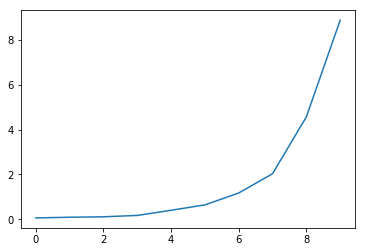

In [149]:
import matplotlib.pyplot as plt
plt.plot([sum(l) / float(len(l)) for l in tt])
plt.show()

In [151]:
# this is clearly exponential so we need to find a way to make it linear
# lets MUDDY THE WATERS
# to do, try muddy proofs and plot the average solve time and try to find a formula for a linear difficulty scale
# for proofs
# Mud is allowing a '1' digit in the otherwise 'clean' leading zero proof such that
# difficulty = 4, mud = 1
# '0000', '1000', '0100', '0010', '0001' are all valid proofs

In [299]:
# a cleaner interface

def gen_nonce():
    return secrets.token_bytes()

def dyno_proof_satisfied(payload: bytes, secret: bytes, difficulty: int=13):
    # calculate the hash of combined payload and secret
    h = hashlib.sha256()
    h.update(payload + secret)
    
    # turn this into a binary substring from index 1 -> the level of difficulty
    BINARY_LITERAL_CLIP = 3
    x = byte_to_int(h.digest())
    x = bin(x)
    x = x[BINARY_LITERAL_CLIP:BINARY_LITERAL_CLIP+difficulty]
    
    # create a string full of zeros the length of the level of difficulty
    y = ''.join(['0' for x in range(difficulty)])
    
    # return the comparison
    return x == y

def find_proof(payload: bytes, generator=gen_nonce, condition=None):
    while True:
        # generate a new secret to test
        secret = generator()
        
        # test said secret
        if condition(payload, secret):
            break
        
    # return when satisfied
    return secret

In [300]:
payload = secrets.token_bytes(256)
x = find_proof(payload, condition=dyno_proof_satisfied)
print(x)
print(dyno_proof_satisfied(payload, x))

b'\x15>\xb6\xeb\xfa\xbeT\x16\xc7s\x83\xe9Y\x8cx\x86\xac\xb7]0G\xccch8\x01\xb8N97\xf6\xe5'
True


In [320]:
# create a simple POW interface so we can test a ton of different proof methods
class POW(object):
    def __init__(self, generator, prover):
        assert generator != None and prover != None, 'Provide a secret generation function and a conditional \
        to test if a proof is valid'
        self.generator = generator
        self.prover = prover
        
    def find(self, payload: bytes):
        while True:
            # generate a new secret to test
            secret = self.generator()

            # test said secret
            if self.prover(payload, secret):
                break

        # return when satisfied
        return secret

    def check(self, payload: bytes, secret: bytes):
        return self.prover(payload, secret)

In [321]:
p = POW(gen_nonce, dyno_proof_satisfied)

In [335]:
test_tx = b'to: stu, from: jason, amount: 500'
x = p.find(test_tx)

In [338]:
x

b'\xad\x98#\xfa\x02\x7f5W\xdbc\xedyk\x17 ]\xa4\xb1T\x96W\xf3\nM\x00\x8bea\xdfE\x7f{'

In [339]:
h = hashlib.sha256()
h.update(test_tx + x)
y = h.digest()
print(bin(byte_to_int(y)))
# '0b1' + '0000000000000' <- difficulty is 12, thus 12 leading zeros on the binary string

0b1000000000000001001100011101111000001000111111010011001100110010001110101100110011101100010101100100110111101111000101000110111100110011010110000110010010011110001011000101001001000000101001011010010111110011101001101010001000110111101001011010000000111110


In [352]:
# takes a payload where the proof can be satisfied if the difficulty string (0000000000) contains up to the mud
# limit (2)
# aka, '0000000000' and '0000100000' and '0000000100' are all valid as well as '0001000100' etc...
# this should provide some flexibility and decrease the exponential difficulty curve so that we can create a nuanced
# POW system. aka, control the exact average milliseconds a proof generally takes
def string_satisfies_mud(s: str, difficulty: int=10, mud: int=2):
    assert len(s) == difficulty, 'Pass in a proof string the length of the true difficulty'
    l = [int(ss) for ss in s]
    return sum(l) <= mud

In [358]:
# test system for MUDDY PROOFS
# because we're using binary strings, we can use binary numbers to generate strings
# wow we're so smart
bin(100)

'0b1100100'

In [359]:
bin(0)

'0b0'

In [360]:
bin(1)

'0b1'

In [361]:
# chances of getting 0 are near impossible so we cut off the first digit

In [362]:
2**10

1024

In [364]:
len(bin(2**10)[3:]) # oh shit

10

In [375]:
def all_possible_proof_strings(difficulty=10):
    possible_proofs = []
    for x in range(2**difficulty):
        proof_string = bin(x)
        while len(proof_string) < 3 + difficulty:
            proof_string = proof_string + '0'
        possible_proofs.append(proof_string[3:])
    return list(set(possible_proofs))

In [379]:
satisfied = []
for proof in all_possible_proof_strings():
    satisfied.append(string_satisfies_mud(proof))

In [386]:
print('{}% increase success potential over unmuddied proof'.format(sum(satisfied) / len(satisfied) * 100))

8.984375% increase success potential over unmuddied proof


In [395]:
# now shit gets hard.
# plot the increase in success potential over unmuddied proof and then try to create a linear relationship
# ugg
# mud can only be as large as the difficulty such that difficulty = 10, mud = 9.
# create a method to come up with the tuple pairs of difficulties and mud
def generate_mud_pairs(max_difficulty = 10):
    combos = []
    for x in range(max_difficulty):
        for y in range(x):
            combos.append((x, y))
    return combos

In [459]:
pprint(generate_mud_pairs(max_difficulty=11))

[(1, 0),
 (2, 0),
 (2, 1),
 (3, 0),
 (3, 1),
 (3, 2),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (5, 0),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (6, 0),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (7, 0),
 (7, 1),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6),
 (8, 0),
 (8, 1),
 (8, 2),
 (8, 3),
 (8, 4),
 (8, 5),
 (8, 6),
 (8, 7),
 (9, 0),
 (9, 1),
 (9, 2),
 (9, 3),
 (9, 4),
 (9, 5),
 (9, 6),
 (9, 7),
 (9, 8),
 (10, 0),
 (10, 1),
 (10, 2),
 (10, 3),
 (10, 4),
 (10, 5),
 (10, 6),
 (10, 7),
 (10, 8),
 (10, 9)]


In [469]:
mud = 2
satisfied = []
for proof in all_possible_proof_strings(difficulty=10):
    satisfied.append(sum([int(ss) for ss in proof]) <= mud)
print(sum(satisfied)/len(satisfied))

0.08984375


In [473]:
percentages = []
for p in generate_mud_pairs(max_difficulty=11):
    mud = p[1]
    satisfied = []
    for proof in all_possible_proof_strings(difficulty=p[0]):
        satisfied.append(sum([int(ss) for ss in proof]) <= mud)
    percentages.append((sum(satisfied)/len(satisfied), p))

In [474]:
print(percentages.sort()) #:(

None


In [475]:
percentages

[(0.001953125, (10, 0)),
 (0.00390625, (9, 0)),
 (0.0078125, (8, 0)),
 (0.015625, (7, 0)),
 (0.01953125, (10, 1)),
 (0.03125, (6, 0)),
 (0.03515625, (9, 1)),
 (0.0625, (5, 0)),
 (0.0625, (8, 1)),
 (0.08984375, (10, 2)),
 (0.109375, (7, 1)),
 (0.125, (4, 0)),
 (0.14453125, (9, 2)),
 (0.1875, (6, 1)),
 (0.2265625, (8, 2)),
 (0.25, (3, 0)),
 (0.25390625, (10, 3)),
 (0.3125, (5, 1)),
 (0.34375, (7, 2)),
 (0.36328125, (9, 3)),
 (0.5, (2, 0)),
 (0.5, (4, 1)),
 (0.5, (6, 2)),
 (0.5, (8, 3)),
 (0.5, (10, 4)),
 (0.63671875, (9, 4)),
 (0.65625, (7, 3)),
 (0.6875, (5, 2)),
 (0.74609375, (10, 5)),
 (0.75, (3, 1)),
 (0.7734375, (8, 4)),
 (0.8125, (6, 3)),
 (0.85546875, (9, 5)),
 (0.875, (4, 2)),
 (0.890625, (7, 4)),
 (0.91015625, (10, 6)),
 (0.9375, (5, 3)),
 (0.9375, (8, 5)),
 (0.96484375, (9, 6)),
 (0.96875, (6, 4)),
 (0.98046875, (10, 7)),
 (0.984375, (7, 5)),
 (0.9921875, (8, 6)),
 (0.99609375, (9, 7)),
 (0.998046875, (10, 8)),
 (1.0, (1, 0)),
 (1.0, (2, 1)),
 (1.0, (3, 2)),
 (1.0, (4, 3)),
 (1

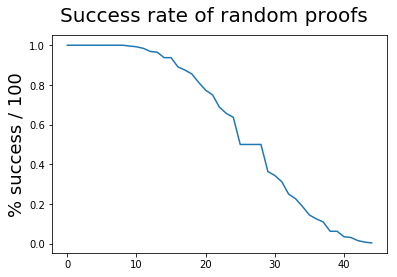

In [465]:
fig = plt.figure()
fig.suptitle('Success rate of random proofs', fontsize=20)
plt.ylabel('% success / 100', fontsize=18)
plt.plot(list(reversed([x[0] for x in percentages])))
plt.show()

In [449]:
def generate_percentages(total=16):
    percentages = []
    for p in generate_mud_pairs(max_difficulty=total):
        mud = p[1]
        satisfied = []
        for proof in all_possible_proof_strings(difficulty=p[0]):
            satisfied.append(sum([int(ss) for ss in proof]) <= mud)
        percentages.append((sum(satisfied)/len(satisfied), p))
    return percentages

In [450]:
p = generate_percentages()

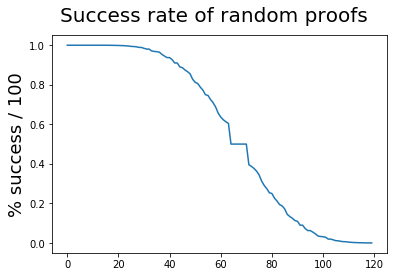

In [451]:
p.sort()
fig = plt.figure()
fig.suptitle('Success rate of random proofs', fontsize=20)
plt.ylabel('% success / 100', fontsize=18)
plt.plot(list(reversed([x[0] for x in p])))
plt.show()

In [486]:
# how long does one proof generation take?
def difficulty_ten():
    payload = secrets.token_bytes()
    t_1 = current_milli_time()
    p = POW(gen_nonce, dyno_proof_satisfied)
    p.find(payload)
    t_2 = current_milli_time()
    return t_2 - t_1

In [476]:
0.001953125 * 100

0.1953125

In [481]:
time_per_single_calculation = 403 / (1/0.001953125)

In [484]:
str(time_per_single_calculation) + ' milliseconds per proof generation and test'

'0.787109375 milliseconds per proof generation and test'

In [504]:
# consumer grade hardware defined as 2015 macbook pro
TIME_TO_COMPLETE_DIFFICULTY_TEN = difficulty_ten()
CONSUMER_HASH_TIME = TIME_TO_COMPLETE_DIFFICULTY_TEN / 2**10
print(CONSUMER_HASH_TIME)

0.2958984375


In [508]:
xx = []
for x in range(100):
    print(x)
    xx.append(difficulty_ten() / 2**10)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [509]:
sum(xx) / len(xx)

0.183369140625

In [ ]:
# how am i getting these numbers?
# 1 / 2**difficulty = average percentage of pure success because only one in 512 will solve the puzzle assuming
# difficulty = 10

# 512 therefore is the average number of random hashes that it will take to solve the puzzle on average. however,
# this always depends because its random
# we compute and time the average time it takes to complete a puzzle with difficulty 10
# we then take that time in milliseconds and divide it by the average number of hashes it takes to complete
# the puzzle. however, this gives inconsistent results because the theoretical average and what pops out of the 
# computer in terms of time is variable. so, we take many samples and average them to get a basic idea of about
# how long it takes. this yields the amount of time it takes per hash on a macbook pro 2015.

# who cares?
# now we can take this number and start to form an additional variable. we want to be able to define how long a 
# puzzle should take based on how large the payload is. these are variables that could be added into the chain's
# governance model (ooo la la)

# for example, we're okay with 1kb being added to the chain every 1 second. thus, we need an algo that fixes the
# puzzle at that. but then we need some sort of 'curve.' are we cool with 2kb every 2 seconds? if so, then we need
# to find what muddy proofs and pure proofs make for the average time to be around 1 second and bind it to the
# payload size

